## HMM with plug&play library

For references check
- https://www.sr-sv.com/classifying-market-regimes/
- https://hmmlearn.readthedocs.io/en/latest/tutorial.html
- https://www.quantstart.com/articles/market-regime-detection-using-hidden-markov-models-in-qstrader/
- https://www.quantstart.com/articles/hidden-markov-models-an-introduction/

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.dates import YearLocator,MonthLocator
from hmmlearn.hmm import GaussianHMM

date
2017-08-01    0.006701
2017-08-02    0.004678
2017-08-03    0.003952
2017-08-04    0.000000
2017-08-07    0.003235
Name: adj close, dtype: float64

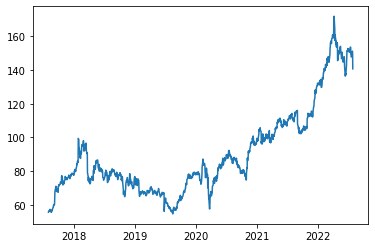

In [14]:
datafile = "../data/daily/stocks/nyse/ABBV.csv"
df = pd.read_csv(datafile)
df.index = pd.to_datetime(df.date)
p = df["adj close"]
r = p.pct_change()
r = r.dropna()
lr = np.log(r+1)
plt.plot(p)
lr.head()

In [17]:
rets = np.column_stack([lr])
hmm_model = GaussianHMM(n_components=3,covariance_type="full",n_iter=1000).fit(rets)

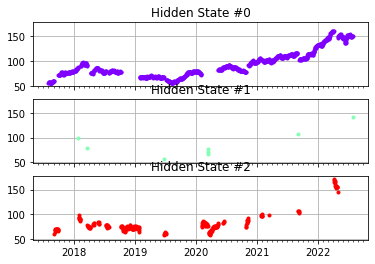

In [19]:
p = df["adj close"][1:]
hidden_states=hmm_model.predict(rets)
# Create the correctly formatted plot
fig, axs = plt.subplots(
    hmm_model.n_components, 
    sharex=True, sharey=True
)
colours = cm.rainbow(
    np.linspace(0, 1, hmm_model.n_components)
)
for i, (ax, colour) in enumerate(zip(axs, colours)):
    mask = hidden_states == i
    ax.plot_date(
        p.index[mask], 
        p[mask], 
        ".", linestyle='none', 
        c=colour
    )
    ax.set_title("Hidden State #%s" % i)
    ax.xaxis.set_major_locator(YearLocator())
    ax.xaxis.set_minor_locator(MonthLocator())
    ax.grid(True)
plt.show()